In [18]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

file1 = pd.read_csv('./spectrum/ToS_Single.csv')
L6 = file1['L6'].values
L7 = file1['L7'].values

design = pd.read_csv('./spectrum/ToS_design.csv')
IM = design['tra'].values
ITO = design['ITO'].values

ITOs = pd.read_csv('./spectrum/TEO/LT_ITO_1.csv')
ITOsn = ITOs['n'].values 
ITOsk = ITOs['k'].values

file = pd.read_csv('./spectrum/Nanya_ITO_grading.csv')
file2 = pd.read_csv('./spectrum/TEO/grading2.csv')

wl = np.linspace(400, 700, 301)
w = file['nm'].values
ws = pd.read_csv('./spectrum/TEO/ws.csv')['nm'].values

n_T = file['n_Top'].values
k_T = file['k_Top'].values
n_B = file['n_Bottom'].values
k_B = file['k_Bottom'].values
n_T2 = file2['n_top'].values
k_T2 = file2['k_top'].values
n_B2 = file2['n_bot'].values
k_B2 = file2['k_bot'].values
ITO_T = ml.Material(w, n_T, k_T, w)
ITO_B = ml.Material(w, n_B, k_B, w)
ITO_T2 = ml.Material(ws, n_T2, k_T2, ws)
ITO_B2 = ml.Material(ws, n_B2, k_B2, ws)
ITOsingle = ml.Material(w, ITOsn, ITOsk, w)

NB_file = pd.read_csv('./spectrum/TEO/NB.csv')
NB1n = NB_file['n1'].values
NB1k = NB_file['k1'].values
NB1 = ml.Material(ws, NB1n, NB1k, ws)

NB2n = NB_file['n2'].values
NB2k = NB_file['k2'].values
NB2 = ml.Material(ws, NB2n, NB2k, ws)

SiO2_1 = pd.read_csv('./spectrum/TEO/SiO2.csv')
SiO21n = SiO2_1['n'].values
SiO21k = SiO2_1['k'].values
SiO2_TEO = ml.Material(ws, SiO21n, SiO21k, ws)

SiO2_2 = pd.read_csv('./spectrum/TEO/SiO2_wafer.csv')
SiO22n = SiO2_2['n']
SiO22k = SiO2_2['k']
SiO22w = SiO2_2['nm']
SiO2_wf = ml.Material(SiO22w, SiO22n, SiO22k, SiO22w)
sub =  pd.read_csv('./spectrum/TEO/glass_air.csv')
soda_n = sub['n'].values
soda_k = sub['k'].values
sodalime_TEO = ml.Material(ws, soda_n, soda_k, ws)

tin =  pd.read_csv('./spectrum/TEO/tin.csv')
tin_n = sub['n'].values
tin_k = sub['k'].values
tin_sub = ml.Material(ws, tin_n, tin_k, ws)

air = ml.Non_Dispersion(1)

ToS = lambda th: tm.Design(
    [air, ITOsingle, SiO2_TEO, NB2, SiO2_TEO, NB1, sodalime_TEO],
    [None, 110, th[0], th[1], th[2], th[3], None]
).reflectance(wl,5)

ToS_tra = lambda th: tm.Design(
    [air, SiO2_TEO, NB2, SiO2_TEO, NB1, tin_sub],
    [None, th[0], th[1], th[2], th[3],None]
).reflectance(wl,5)

fom = lambda th: np.mean(abs(ToS(th)-ToS_tra(th)+0.003))
fom2 = lambda th: tm.RMSE(100*ToS(th), R)

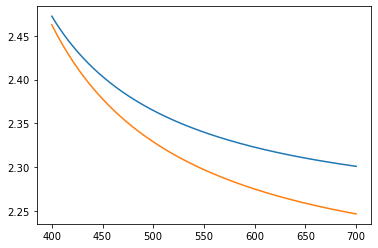

In [6]:
plt.plot(wl, NB1.nvalues(wl))
plt.plot(wl, NB2.nvalues(wl))
plt.show()

In [104]:
sol = differential_evolution(
    fom, [
        (4,50),(4,20),(30,70),(0,20)
    ], disp=True, polish=False, popsize=20, mutation=0.3, recombination =0.9,strategy = 'best1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 0.00274997
differential_evolution step 2: f(x)= 0.00270125
differential_evolution step 3: f(x)= 0.00259902
differential_evolution step 4: f(x)= 0.00236915
differential_evolution step 5: f(x)= 0.00225717
differential_evolution step 6: f(x)= 0.00205975
differential_evolution step 7: f(x)= 0.00190585
differential_evolution step 8: f(x)= 0.00178259
differential_evolution step 9: f(x)= 0.00171967
differential_evolution step 10: f(x)= 0.00170292
differential_evolution step 11: f(x)= 0.00156107
differential_evolution step 12: f(x)= 0.00138506
differential_evolution step 13: f(x)= 0.00138263
differential_evolution step 14: f(x)= 0.00138242
differential_evolution step 15: f(x)= 0.00138148
differential_evolution step 16: f(x)= 0.00138081
differential_evolution step 17: f(x)= 0.00138074
[22.81732708 12.80992777 51.58707178  3.58599975]


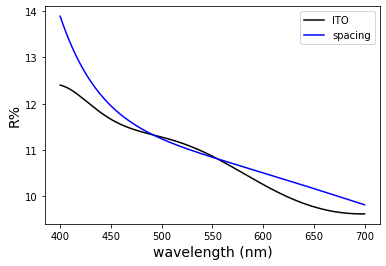

0.10804437824956785
0.11058557557349256
0.0027702946497641266
0.025640340521606058


In [3]:
##### m2 = [23.86971641,12.92614156]
f2 = [26.99052172,11.4910691]
m1 = [24.80405176,19.29911854,53.86121217,7.16488668]
f1 = [22.60574197,20.60969685,51.10451728,7.33335654]
ff = [24.3, 19.8, 50.8, 7.1]
m0 = [24.3, 20.35, 57.48, 8.71]
f0 = [23.4, 13.8, 56.6, 5.0]
mm = [23.8, 13.8, 55.6, 3.6]
tk = mm
#plt.plot(wl, abs(ToS(tk)-ToS_tra(tk)))
plt.plot(wl, 100*ToS(tk), '-k', label = 'ITO')
plt.plot(wl, 100*ToS_tra(tk), '-b', label = 'spacing')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('Nanya_ToS.png')
plt.show()
deltaR = np.mean(abs(ToS(tk)-ToS_tra(tk)))
RITO = np.mean(ToS(tk))
print(RITO)
print(np.mean(ToS_tra(tk)))
print(deltaR)
print(deltaR/RITO)
#pd.DataFrame({'ITO':100*ToS(tk), 'tra':100*ToS_tra(tk)}).to_csv('ToS_design.csv')

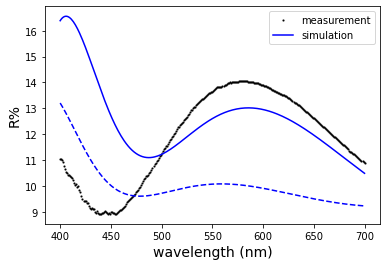

In [19]:
plt.plot(wl, L6, 'ks', markersize = 1, label = 'measurement')
plt.plot(wl, 100*ToS(m0), '-b', label = 'simulation')
plt.plot(wl, ITO, '--b')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('Nanya_ToS_ITO.png')
plt.show()

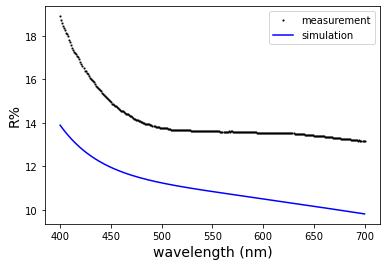

In [15]:
plt.plot(wl, L7, 'ks', markersize = 1, label = 'measurement')
plt.plot(wl, 100*ToS_tra(tk), '-b', label = 'simulation')
#plt.plot(wl, IM, '--b')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('Nanya_ToS_IM.png')
plt.show()

In [180]:
import random
for i in np.linspace(21.8, 23.8, 3):
    for j in np.linspace(11.8, 13.8, 3):
        for k in np.linspace(51.6, 53.6, 3):
            for l in np.linspace(2, 5.2, 3):
                t = [i, j, k, l]
                a = []
                for p in range(0,100):
                    a0 = t[0]+random.uniform(-2,+2)
                    a1 = t[1]+random.uniform(-2,+2)
                    a2 = t[2]+random.uniform(-2,+2)
                    a3 = t[3]+random.uniform(-2,+2)
                    AAA = [a0, a1, a2, a3]
                    R_ITO = ToS(AAA)
                    deltaR = np.mean(abs(R_ITO-ToS_tra(AAA)))
                    if (deltaR/np.mean(R_ITO)) < 0.08:
                        a.append(np.mean(abs(ToS(AAA)-ToS_tra(AAA))))
                print(len(a), t)

58 [21.8, 11.8, 51.6, 2.0]
77 [21.8, 11.8, 51.6, 3.6]
44 [21.8, 11.8, 51.6, 5.2]
67 [21.8, 11.8, 52.6, 2.0]
75 [21.8, 11.8, 52.6, 3.6]
44 [21.8, 11.8, 52.6, 5.2]
55 [21.8, 11.8, 53.6, 2.0]
64 [21.8, 11.8, 53.6, 3.6]
34 [21.8, 11.8, 53.6, 5.2]
40 [21.8, 12.8, 51.6, 2.0]
64 [21.8, 12.8, 51.6, 3.6]
58 [21.8, 12.8, 51.6, 5.2]
44 [21.8, 12.8, 52.6, 2.0]
70 [21.8, 12.8, 52.6, 3.6]
56 [21.8, 12.8, 52.6, 5.2]
55 [21.8, 12.8, 53.6, 2.0]
73 [21.8, 12.8, 53.6, 3.6]
62 [21.8, 12.8, 53.6, 5.2]
23 [21.8, 13.8, 51.6, 2.0]
66 [21.8, 13.8, 51.6, 3.6]
64 [21.8, 13.8, 51.6, 5.2]
28 [21.8, 13.8, 52.6, 2.0]
70 [21.8, 13.8, 52.6, 3.6]
70 [21.8, 13.8, 52.6, 5.2]
23 [21.8, 13.8, 53.6, 2.0]
73 [21.8, 13.8, 53.6, 3.6]
68 [21.8, 13.8, 53.6, 5.2]
56 [22.8, 11.8, 51.6, 2.0]
73 [22.8, 11.8, 51.6, 3.6]
51 [22.8, 11.8, 51.6, 5.2]
58 [22.8, 11.8, 52.6, 2.0]
74 [22.8, 11.8, 52.6, 3.6]
43 [22.8, 11.8, 52.6, 5.2]
60 [22.8, 11.8, 53.6, 2.0]
72 [22.8, 11.8, 53.6, 3.6]
27 [22.8, 11.8, 53.6, 5.2]
39 [22.8, 12.8, 51.6, 2.0]
7